In [5]:
!pip install imutils opencv-python numpy pandas scikit-learn matplotlib scipy scikit-image keras tensorflow


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [ ]:
!pip install torch torchvision torchaudio


🚀 Using device: cpu


In [ ]:
!mkdir /tmp/prepared_data/

!mkdir /tmp/prepared_data/benign
!mkdir /tmp/prepared_data/PreB
!mkdir /tmp/prepared_data/ProB
!mkdir /tmp/prepared_data/EarlyPreB

!mkdir /tmp/prepared_test/

!mkdir /tmp/prepared_test/benign
!mkdir /tmp/prepared_test/PreB
!mkdir /tmp/prepared_test/ProB
!mkdir /tmp/prepared_test/EarlyPreB

In [11]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 6.2 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.7 MB 4.9 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/8.7 MB 4.0 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.7 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 3.9/8.7 MB 3.9 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.7 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 5.5/8.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.7 MB 3.9 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 3.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import os
import shutil
import random
from pathlib import Path

# Set your source and destination paths
source_base = r'Blood cell Cancer [ALL]'  # Current folder (relative to notebook)
output_base = r'Cancer_Split_Dataset'     # Output folder

# Folder name mapping (source → destination)
class_map = {
    'Benign': 'Benign',
    '[Malignant] Pre-B': 'Malignant'
}

# Split ratios
ratios = {
    'train': 0.7,
    'val': 0.15,
    'test': 0.15
}

# Create output folders
for split in ratios.keys():
    for class_label in class_map.values():
        Path(output_base, split, class_label).mkdir(parents=True, exist_ok=True)

# Split and copy images
for src_folder, dst_class in class_map.items():
    full_src_path = Path(source_base, src_folder)
    if not full_src_path.exists():
        print(f"❌ Folder not found: {full_src_path}")
        continue

    image_files = [f for f in full_src_path.glob('*') if f.suffix.lower() in ['.jpg', '.jpeg', '.png']]
    total = len(image_files)
    if total == 0:
        print(f"⚠️ No images found in {src_folder}")
        continue

    print(f"📂 Found {total} images in '{src_folder}'")

    random.shuffle(image_files)
    train_end = int(total * ratios['train'])
    val_end = train_end + int(total * ratios['val'])

    split_dict = {
        'train': image_files[:train_end],
        'val': image_files[train_end:val_end],
        'test': image_files[val_end:]
    }

    for split, files in split_dict.items():
        for file_path in files:
            dest = Path(output_base, split, dst_class, file_path.name)
            shutil.copy(file_path, dest)

    print(f"✅ '{dst_class}' images split into train/val/test")

print("\n🎉 Done! Dataset organized in 'Cancer_Split_Dataset/' folder.")


📂 Found 335 images in 'Benign'
✅ 'Benign' images split into train/val/test
📂 Found 417 images in '[Malignant] Pre-B'
✅ 'Malignant' images split into train/val/test

🎉 Done! Dataset organized in 'Cancer_Split_Dataset/' folder.


In [15]:
import os

base_path = r'C:\Users\vinay\OneDrive\Desktop\Cancer\Caner cell imgs\Blood cell Cancer [ALL]'
benign_path = os.path.join(base_path, 'Benign')
malignant_path = os.path.join(base_path, '[Malignant] Pre-B')

print("✅ Checking paths:")
print("Benign exists:   ", os.path.exists(benign_path))
print("Malignant exists:", os.path.exists(malignant_path))

print("\n📁 Files in Benign:")
print(os.listdir(benign_path) if os.path.exists(benign_path) else "❌ Not Found")

print("\n📁 Files in [Malignant] Pre-B:")
print(os.listdir(malignant_path) if os.path.exists(malignant_path) else "❌ Not Found")


✅ Checking paths:
Benign exists:    True
Malignant exists: True

📁 Files in Benign:
['Snap_037 (3).jpg', 'Snap_037.jpg', 'Snap_038 (2).jpg', 'Snap_038 (3).jpg', 'Snap_038.jpg', 'Snap_039 (2).jpg', 'Snap_039 (3).jpg', 'Snap_039.jpg', 'Snap_040 (2).jpg', 'Snap_040 (3).jpg', 'Snap_040.jpg', 'Snap_041 (2).jpg', 'Snap_041 (3).jpg', 'Snap_041.jpg', 'Snap_042 (2).jpg', 'Snap_042 (3).jpg', 'Snap_042.jpg', 'Snap_043 (2).jpg', 'Snap_043 (3).jpg', 'Snap_043.jpg', 'Snap_044 (2).jpg', 'Snap_044 (3).jpg', 'Snap_044.jpg', 'Snap_045 (2).jpg', 'Snap_045 (3).jpg', 'Snap_045.jpg', 'Snap_046 (2).jpg', 'Snap_046 (3).jpg', 'Snap_046.jpg', 'Snap_047 (2).jpg', 'Snap_047 (3).jpg', 'Snap_047.jpg', 'Snap_048 (2).jpg', 'Snap_048 (3).jpg', 'Snap_048.jpg', 'Snap_049 (2).jpg', 'Snap_049 (3).jpg', 'Snap_049.jpg', 'Snap_050 (2).jpg', 'Snap_050 (3).jpg', 'Snap_050.jpg', 'Snap_051 (2).jpg', 'Snap_051 (3).jpg', 'Snap_051.jpg', 'Snap_052 (2).jpg', 'Snap_052 (3).jpg', 'Snap_052.jpg', 'Snap_053 (2).jpg', 'Snap_053 (3).jpg',

In [ ]:
import tensorflow as tf

# Set your path
dataset_dir = 'Cancer_Split_Dataset'

# Define image properties
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'  # For multi-class classification
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir + "/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

# Optional: Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

class_names = train_ds.class_names
print(f"✅ Class labels: {class_names}")


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Using device: {device}")


🚀 Using device: cpu


In [19]:
# Paths
data_dir = 'Cancer_Split_Dataset'
IMG_SIZE = 224
BATCH_SIZE = 32

# Transforms
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Datasets
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
val_dataset   = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=val_test_transforms)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE)

class_names = train_dataset.classes
print(f"✅ Classes: {class_names}")


✅ Classes: ['Benign', 'Malignant']


In [21]:
import torch
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

print("🔥 PyTorch version:", torch.__version__)


🔥 PyTorch version: 2.7.1+cpu


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ✅ Device setup (CPU in your case)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"📦 Using device: {device}")

# ✅ Image paths and setup
data_dir = 'Cancer_Split_Dataset'
IMG_SIZE = 224
BATCH_SIZE = 32

# ✅ Transforms
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Datasets and loaders
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
val_dataset   = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=test_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# ✅ Class names
class_names = train_dataset.classes
print(f"🔎 Classes: {class_names}")

# ✅ Load pretrained model and modify
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 2 output classes
model = model.to(device)

# ✅ Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training loop
def train_model(model, criterion, optimizer, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = correct / len(train_dataset)

        print(f"📘 Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc*100:.2f}%")

# 🔁 Train model
train_model(model, criterion, optimizer, epochs=10)

# ✅ Evaluation
def evaluate(model, loader, name="Test"):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    print(f"✅ {name} Accuracy: {(correct / total) * 100:.2f}%")

evaluate(model, test_loader, "Test")


📦 Using device: cpu
🔎 Classes: ['Benign', 'Malignant']
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\vinay/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


c:\Users\vinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100.0%


📘 Epoch 1/10 - Loss: 0.1157 - Accuracy: 95.43%
📘 Epoch 2/10 - Loss: 0.0189 - Accuracy: 99.24%
📘 Epoch 3/10 - Loss: 0.0089 - Accuracy: 99.81%
📘 Epoch 4/10 - Loss: 0.0036 - Accuracy: 100.00%
📘 Epoch 5/10 - Loss: 0.0029 - Accuracy: 100.00%
📘 Epoch 6/10 - Loss: 0.0016 - Accuracy: 100.00%
📘 Epoch 7/10 - Loss: 0.0013 - Accuracy: 100.00%
📘 Epoch 8/10 - Loss: 0.0019 - Accuracy: 100.00%


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# ✅ Device setup (CPU in your case)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"📦 Using device: {device}")

# ✅ Image paths and setup
data_dir = 'Cancer_Split_Dataset'
IMG_SIZE = 224
BATCH_SIZE = 32

# ✅ Transforms
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])
test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ✅ Datasets and loaders
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)
val_dataset   = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=test_transforms)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# ✅ Class names
class_names = train_dataset.classes
print(f"🔎 Classes: {class_names}")

# ✅ Load pretrained model and modify
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # 2 output classes
model = model.to(device)

# ✅ Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# ✅ Training loop



📦 Using device: cpu
🔎 Classes: ['Benign', 'Malignant']


c:\Users\vinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vinay\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


📘 Epoch 1/10 - Loss: 0.1295 - Accuracy: 93.90%
📘 Epoch 2/10 - Loss: 0.0048 - Accuracy: 99.81%
📘 Epoch 3/10 - Loss: 0.0248 - Accuracy: 99.05%
📘 Epoch 4/10 - Loss: 0.0106 - Accuracy: 99.81%
📘 Epoch 5/10 - Loss: 0.0032 - Accuracy: 100.00%
📘 Epoch 6/10 - Loss: 0.0016 - Accuracy: 100.00%
📘 Epoch 7/10 - Loss: 0.0010 - Accuracy: 100.00%
📘 Epoch 8/10 - Loss: 0.0010 - Accuracy: 100.00%
📘 Epoch 9/10 - Loss: 0.0006 - Accuracy: 100.00%
📘 Epoch 10/10 - Loss: 0.0005 - Accuracy: 100.00%
✅ Test Accuracy: 100.00%


In [8]:
# ✅ Training loop with tracking
def train_model(model, criterion, optimizer, epochs=10):
    global losses, accuracies  # So we can access them in graph cell
    losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()

        epoch_loss = running_loss / len(train_dataset)
        epoch_acc = correct / len(train_dataset)

        # 🔁 Save for graph
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)

        print(f"📘 Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Accuracy: {epoch_acc*100:.2f}%")


In [10]:
# 🔁 Run training
train_model(model, criterion, optimizer, epochs=10)


📘 Epoch 1/10 - Loss: 0.0005 - Accuracy: 100.00%
📘 Epoch 2/10 - Loss: 0.0011 - Accuracy: 100.00%
📘 Epoch 3/10 - Loss: 0.0002 - Accuracy: 100.00%
📘 Epoch 4/10 - Loss: 0.0005 - Accuracy: 100.00%
📘 Epoch 5/10 - Loss: 0.0002 - Accuracy: 100.00%
📘 Epoch 6/10 - Loss: 0.0003 - Accuracy: 100.00%
📘 Epoch 7/10 - Loss: 0.0003 - Accuracy: 100.00%
📘 Epoch 8/10 - Loss: 0.0004 - Accuracy: 100.00%
📘 Epoch 9/10 - Loss: 0.0003 - Accuracy: 100.00%
📘 Epoch 10/10 - Loss: 0.0004 - Accuracy: 100.00%


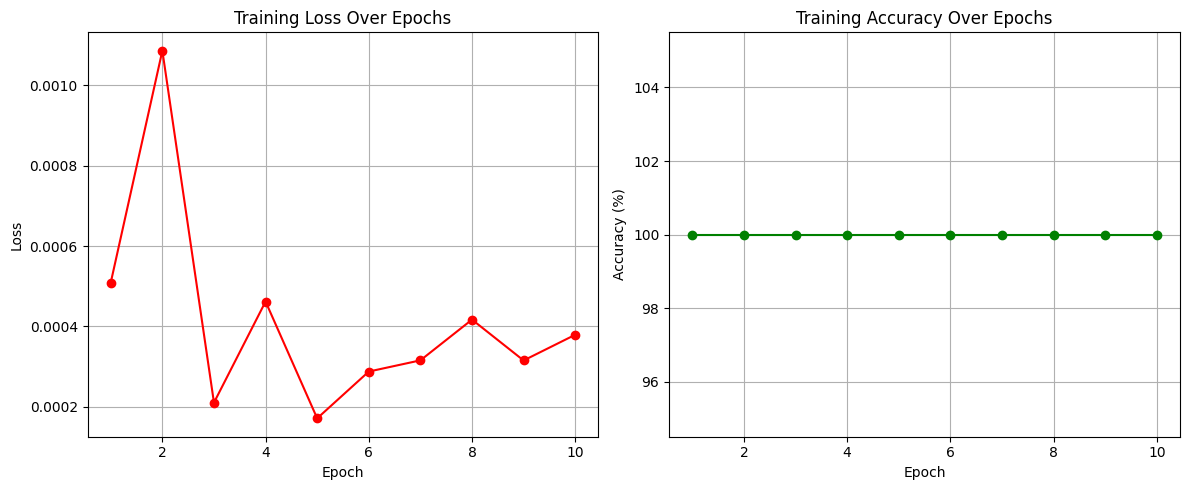

In [11]:
import matplotlib.pyplot as plt

# ➕ Convert accuracy to %
accuracies_percent = [a * 100 for a in accuracies]
epochs = range(1, len(losses) + 1)

plt.figure(figsize=(12, 5))

# 📉 Loss Graph
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, 'r-o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# 📈 Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracies_percent, 'g-o')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()


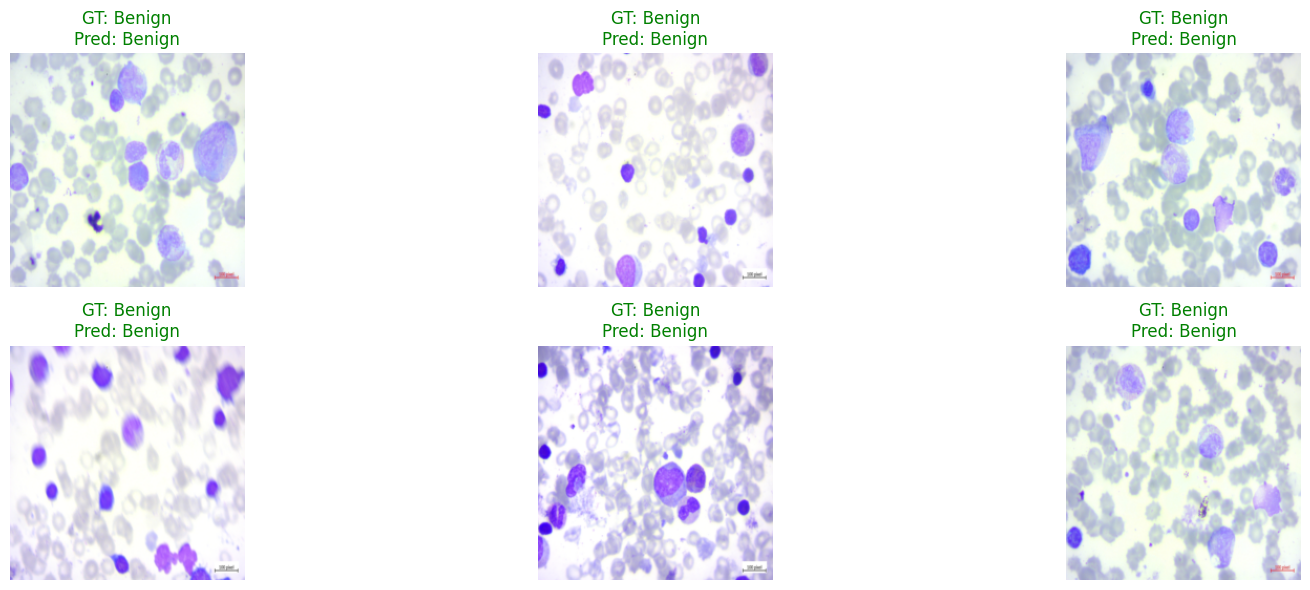

In [12]:
import matplotlib.pyplot as plt

def show_predictions(model, loader, class_names, num_images=6):
    model.eval()
    images_shown = 0

    plt.figure(figsize=(18, 6))
    
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                if images_shown >= num_images:
                    break

                img = inputs[i].cpu().permute(1, 2, 0)  # CHW → HWC
                img = img * 0.5 + 0.5  # Unnormalize
                true_label = class_names[labels[i].item()]
                pred_label = class_names[preds[i].item()]
                correct = (true_label == pred_label)

                plt.subplot(2, num_images//2, images_shown + 1)
                plt.imshow(img)
                plt.title(f"GT: {true_label}\nPred: {pred_label}",
                          color='green' if correct else 'red')
                plt.axis('off')

                images_shown += 1

            if images_shown >= num_images:
                break

    plt.tight_layout()
    plt.show()

# 🔍 Show predictions from test set
show_predictions(model, test_loader, class_names, num_images=6)


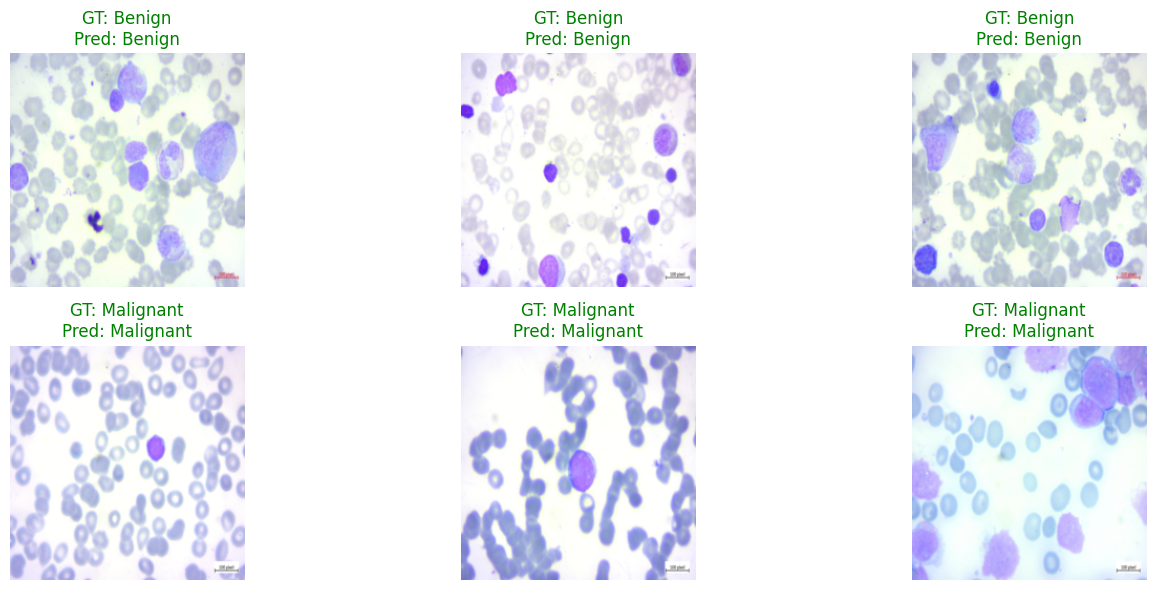

In [13]:
def show_classwise_predictions(model, loader, class_names, num_per_class=3):
    model.eval()
    shown = {0: 0, 1: 0}  # 0 = Benign, 1 = Malignant
    max_total = num_per_class * 2
    images = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size(0)):
                label = labels[i].item()
                if shown[label] < num_per_class:
                    images.append((inputs[i].cpu(), label, preds[i].cpu()))
                    shown[label] += 1

                if sum(shown.values()) >= max_total:
                    break
            if sum(shown.values()) >= max_total:
                break

    # 👉 Plot
    plt.figure(figsize=(15, 6))
    for idx, (img_tensor, true_label, pred_label) in enumerate(images):
        img = img_tensor.permute(1, 2, 0) * 0.5 + 0.5  # unnormalize
        correct = (true_label == pred_label)
        plt.subplot(2, num_per_class, idx + 1)
        plt.imshow(img)
        plt.title(f"GT: {class_names[true_label]}\nPred: {class_names[pred_label]}",
                  color='green' if correct else 'red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 🚀 Call the function
show_classwise_predictions(model, test_loader, class_names, num_per_class=3)


C:\Users\vinay\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


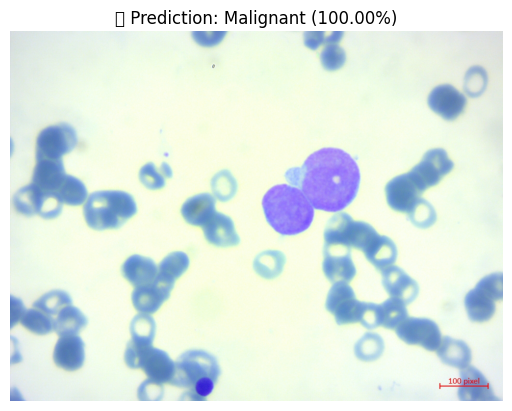

('Malignant', 0.9999884366989136)

In [15]:
from PIL import Image
import torchvision.transforms as transforms

def predict_single_image(image_path, model, class_names):
    # 🔁 Set model to eval mode
    model.eval()

    # 🔧 Define same transform as test
    transform = transforms.Compose([
        transforms.Resize((IMG_SIZE, IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    # 📸 Load and preprocess image
    img = Image.open(image_path).convert('RGB')
    input_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)
        predicted_class = class_names[predicted.item()]
        confidence = torch.nn.functional.softmax(output, dim=1)[0][predicted.item()].item()

    # 🖼️ Show image with prediction
    plt.imshow(img)
    plt.title(f"🔍 Prediction: {predicted_class} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# 🧪 Example usage (change path to your uploaded file):
# Upload via Colab or Jupyter UI, or set correct path here
image_path = "Snap_033.jpg"  # Replace with uploaded path
predict_single_image(image_path, model, class_names)


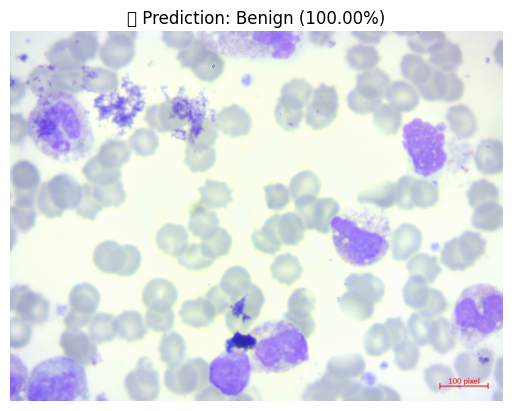

('Benign', 0.9999843835830688)

In [ ]:
image_path = "Snap_070.jpg"  
predict_single_image(image_path, model, class_names)

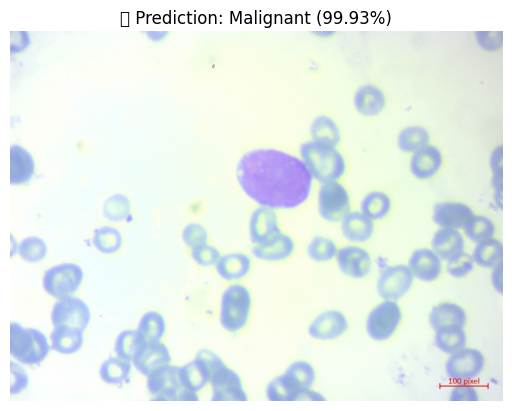

('Malignant', 0.9992837309837341)

In [ ]:
image_path = "Snap_00s2.jpg"  
predict_single_image(image_path, model, class_names)

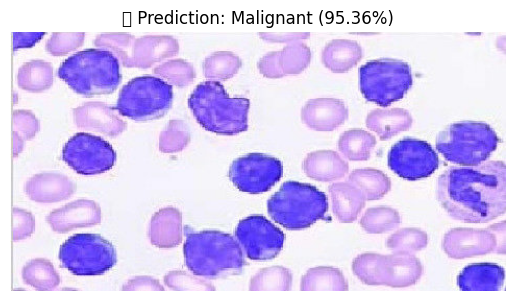

('Malignant', 0.9536477327346802)

In [ ]:
image_path = "Microscopic-Image-of-blood-Samples.png"  
predict_single_image(image_path, model, class_names)

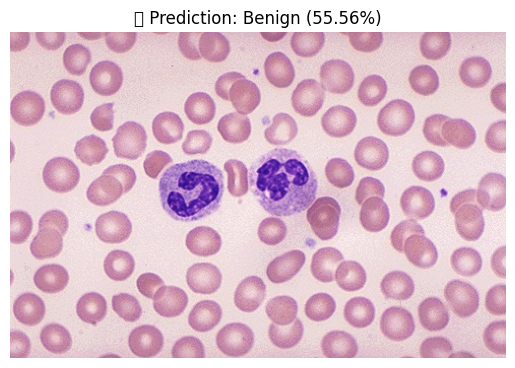

('Benign', 0.5556337833404541)

In [22]:
image_path = "HEME001.jpg"  
predict_single_image(image_path, model, class_names)